# What is RFM Analysis?
RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

- Recency: When was the last time they purchased?
- Frequency: How often and for how long have they purchased?
- Monetary Value/Sales: How much have they purchased?



In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib notebook
%matplotlib inline

In [75]:
df = pd.read_csv("Data/Dataset.csv", sep = ";")

In [76]:
df.head()

,Customer Number,Gender,Date of Birth,Postcode,COUNT2015,SUM2015,MERCHANDISE2015,COUNT2016,SUM2016,MERCHANDISE2016,...,SUM2017,MERCHANDIESE2017,COUNT2018,SUM2018,MERCHANDIESE2018,COUNT2019,SUM2019,MERCHANDISE2019,LastPaymentDate,PenultimatePaymentDate
0,1,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,18.12.2019,NaN
1,2,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"1,53",0,28.12.2019,NaN
2,3,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,05.12.2019,NaN
3,4,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,04.06.2019,NaN
4,5,female,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,95",0,30.03.2019,NaN


In [77]:
df.shape

(406734, 21)

In [78]:
def check_for_missing_and_null(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                            'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df

In [79]:
check_for_missing_and_null(df)

,columns,percent_null,percent_zero
Customer Number,Customer Number,0.000000,0.000000
Gender,Gender,0.000000,0.000000
Date of Birth,Date of Birth,38.229162,0.000000
Postcode,Postcode,2.256020,0.000000
COUNT2015,COUNT2015,0.000000,44.708581
SUM2015,SUM2015,0.000000,0.000000
MERCHANDISE2015,MERCHANDISE2015,0.000000,98.797986
COUNT2016,COUNT2016,0.000000,46.104088
SUM2016,SUM2016,0.000000,0.000000
MERCHANDISE2016,MERCHANDISE2016,0.000000,98.734062


In [80]:
# replace tnull values with 0 so our algorithms can work with it
df['Date of Birth'] = df['Date of Birth'].fillna(0)
df['Postcode'] = df['Postcode'].fillna(0)
df['PenultimatePaymentDate'] = df['PenultimatePaymentDate'].fillna(0)

In [81]:
check_for_missing_and_null(df)

,columns,percent_null,percent_zero
Customer Number,Customer Number,0.0,0.000000
Gender,Gender,0.0,0.000000
Date of Birth,Date of Birth,0.0,38.229162
Postcode,Postcode,0.0,2.256020
COUNT2015,COUNT2015,0.0,44.708581
SUM2015,SUM2015,0.0,0.000000
MERCHANDISE2015,MERCHANDISE2015,0.0,98.797986
COUNT2016,COUNT2016,0.0,46.104088
SUM2016,SUM2016,0.0,0.000000
MERCHANDISE2016,MERCHANDISE2016,0.0,98.734062


In [82]:
df = df.rename(
    {
        'Gender': 'gender', 
        'Date of Birth': 'dob',
        'Postcode': 'zip',
        'COUNT2015': 'count_2015',
        'SUM2015': 'sum_2015',
        'MERCHANDISE2015': 'merch_2015',
        'COUNT2016': 'count_2016',
        'SUM2016': 'sum_2016',
        'MERCHANDISE2016': 'merch_2016',
        'COUNT2017': 'count_2017',
        'SUM2017': 'sum_2017',
        'MERCHANDIESE2017': 'merch_2017',
        'COUNT2018': 'count_2018',
        'SUM2018': 'sum_2018',
        'MERCHANDIESE2018': 'merch_2018',
        'COUNT2019': 'count_2019',
        'SUM2019': 'sum_2019',
        'MERCHANDISE2019': 'merch_2019',
        'LastPaymentDate': 'last_payment_date',
        'PenultimatePaymentDate': 'penultimate_payment_date',
    }, axis='columns')

In [83]:
df.head()

,Customer Number,gender,dob,zip,count_2015,sum_2015,merch_2015,count_2016,sum_2016,merch_2016,...,sum_2017,merch_2017,count_2018,sum_2018,merch_2018,count_2019,sum_2019,merch_2019,last_payment_date,penultimate_payment_date
0,1,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,18.12.2019,0
1,2,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"1,53",0,28.12.2019,0
2,3,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,05.12.2019,0
3,4,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,5",0,04.06.2019,0
4,5,female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,"4,95",0,30.03.2019,0


In [84]:
df.shape

(406734, 21)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406734 entries, 0 to 406733
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Customer Number           406734 non-null  int64 
 1   gender                    406734 non-null  object
 2   dob                       406734 non-null  object
 3   zip                       406734 non-null  object
 4   count_2015                406734 non-null  int64 
 5   sum_2015                  406734 non-null  object
 6   merch_2015                406734 non-null  int64 
 7   count_2016                406734 non-null  int64 
 8   sum_2016                  406734 non-null  object
 9   merch_2016                406734 non-null  int64 
 10  count_2017                406734 non-null  int64 
 11  sum_2017                  406734 non-null  object
 12  merch_2017                406734 non-null  int64 
 13  count_2018                406734 non-null  int64 
 14  sum_

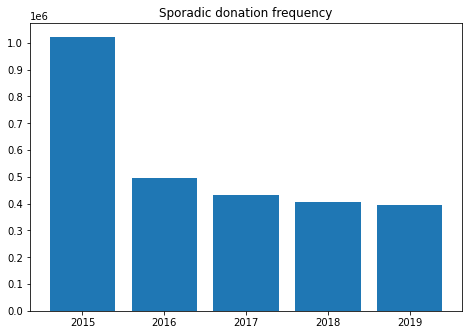


2015: 1023280
2019: 392960
Down by 38.4 %


In [86]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0, 1010000, 100000))
years = ['2015', '2016', '2017', '2018', '2019']
counts = [
    df['sum_2015'].sum(),
    df['sum_2016'].sum(),
    df['sum_2017'].sum(),
    df['sum_2018'].sum(),
    df['sum_2019'].sum()
]
ax.bar(years, counts)
plt.title('Sporadic donation frequency')
plt.show()

print("")
print("2015:", df['sum_2015'].sum())
print("2019:", df['sum_2019'].sum())
print("Down by", round((df['count_2019'].sum() / df['count_2015'].sum()) * 100,2), "%" )

In [87]:
df_test = df[['count_2015','count_2016','count_2017','count_2018','count_2019','merch_2015','merch_2016','merch_2017','merch_2018','merch_2019']]

## rfm
- [https://www.optimove.com/resources/learning-center/rfm-segmentation](https://www.optimove.com/resources/learning-center/rfm-segmentation)
- [https://www.kaggle.com/farazrahman/clustering-the-donors-with-rfm-analysis](https://www.kaggle.com/farazrahman/clustering-the-donors-with-rfm-analysis)
- [https://silo.tips/download/customer-selection-for-direct-marketing-biobjective-optimization-using-support-v](https://silo.tips/download/customer-selection-for-direct-marketing-biobjective-optimization-using-support-v)

## K means
- https://medium.com/clustering-segmentation/introduction-7321e39c595e
- https://medium.com/@emresirma/customer-segmentation-with-k-means-algorithm-de122c0b4b27
- https://medium.com/analytics-vidhya/customer-segmentation-with-rfm-analysis-kmeans-clustering-32c387d04dfe
- http://www.kimberlycoffey.com/blog/2016/8/k-means-clustering-for-customer-segmentation

## XG Boost
- https://towardsdatascience.com/xgboost-for-multi-class-classification-799d96bcd368
- https://www.kaggle.com/miljan/customer-segmentation
- https://debuggercafe.com/introduction-to-xgboost-in-python/
- https://medium.com/merino-services-analytics-blog/customer-segmentation-with-rfm-analysis-part-2-eadf3b220540
- https://towardsdatascience.com/boosting-sales-through-customer-segmentation-analysis-knowing-the-market-better-8c7feebd3479

## Step 1
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. 

## Step 2
The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M)

## Step 3
The third step is to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

In [ ]:
# Calcuation Monetary
df['TotalSum'] = df['Quantity'] * df['UnitPrice']

# Calculation Recency 
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

# Grouping by CustomerID
## and Calculation frequency 
rfm = df.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

# Rename the columns 
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'Monetary'}, inplace=True)

Customer Number:	        Unique Identifier of Donor<br/>
Gender:	                    Gender of person<br/>
Date of Birth:	            Customer´s date of birth (dd.mm.yyyy)<br/>
Postcode:	                Postal code (Austria)<br/>
COUNT2015:	                Sporadic Donation Frequency 2015<br/>
SUM2015:	                Sporadic Donation Sum 2015<br/>
MERCHANDISE2015:	        Has customer made at least one purchase in merchandising store in 2015?<br/>
COUNT2016:	                Sporadic Donation Frequency 2016<br/>
SUM2016:	                Sporadic Donation Sum 2016<br/>
MERCHANDISE2016:	        Has customer made at least one purchase in merchandising store in 2016?<br/>
COUNT2017:	                Sporadic Donation Frequency 2017<br/>
SUM2017:	                Sporadic Donation Sum 2017<br/>
MERCHANDIESE2017:	        Has customer made at least one purchase in merchandising store in 2017?<br/>
COUNT2018:	                Sporadic Donation Frequency 2018<br/>
SUM2018:	                Sporadic Donation Sum 2018<br/>
MERCHANDIESE2018:	        Has customer made at least one purchase in merchandising store in 2018?<br/>
COUNT2019:	                Sporadic Donation Frequency 2019<br/>
SUM2019:	                Sporadic Donation Sum 2019<br/>
MERCHANDISE2019:	        Has customer made at least one purchase in merchandising store in 2019?<br/>
LastPaymentDate:	        Last payment date of customer<br/>
PenultimatePaymentDate:	    Penultimate payment date of customer<br/>